<a href="https://colab.research.google.com/github/Athulkrishna-S/L-and-T/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

os.makedirs('/root/.kaggle', exist_ok=True)
# Creates the '/root/.kaggle' directory where the Kaggle API expects the API key file (kaggle.json).
# The 'exist_ok=True' ensures no error is raised if the directory already exists.

!cp kaggle.json /root/.kaggle/
# Copies the 'kaggle.json' file (your Kaggle API key) from the current working directory to '/root/.kaggle'.
# The 'cp' is used command for copying files.

!chmod 600 /root/.kaggle/kaggle.json
# Changes the file permissions for 'kaggle.json' to be secure.
# 'chmod 600' sets the file so that only the file owner has read and write permissions,
# ensuring the API key cannot be accessed by unauthorized users or processes.


In [ ]:
!pip install kaggle

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 71.2MB/s]


In [ ]:
!unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
!pip install pandas scikit-learn

In [ ]:
import pandas as pd

train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train.shape

(1460, 81)

In [ ]:
# List of features (keys from input_data dictionary)
selected_features = [
    'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
    'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
    'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
    'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
    'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
    'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
    'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
    'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
    'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
    'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
    'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
    'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
    'MoSold', 'YrSold', 'SaleType', 'SaleCondition'
]

train_features = selected_features + ['SalePrice']

# Subset the train and test data
train = train[train_features]
test = test[selected_features]


In [ ]:
test.shape

(1459, 79)

In [ ]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

***Now handle missing value in Dataset***

In [ ]:
import sklearn
from sklearn.impute import SimpleImputer # use SimpleImputer to replace Nan values with mean , median or mode

In [ ]:
numerical_columns=train.select_dtypes(include=['int64','float64']).columns # dtypes () method for filtering columns based on datatype
# include is used to include those data types
categorical_columns=train.select_dtypes(include=['object']).columns # .columns retrieves only the column names as a Pandas Index object.

In [ ]:
print(numerical_columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [ ]:
print(categorical_columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [ ]:
numerical_columns = numerical_columns.drop('SalePrice')  # Exclude target column from numerical columns

num_imputer = SimpleImputer(strategy='mean') # replace Nan values with mean of column for numerical columns
cat_imputer = SimpleImputer(strategy='most_frequent') # replace Nan values with most_frequent of column for categorical columns

train[numerical_columns] = num_imputer.fit_transform(train[numerical_columns])
test[numerical_columns] = num_imputer.fit_transform(test[numerical_columns])  # we are using same numerical_columns in test bcz the data type of columns is same for test and train

train[categorical_columns] = cat_imputer.fit_transform(train[categorical_columns])
test[categorical_columns] = cat_imputer.fit_transform(test[categorical_columns])

In [ ]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,RL,65.0,8450.0,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0.0,Gd,MnPrv,Shed,0.0,2.0,2008.0,WD,Normal,208500
1,20.0,RL,80.0,9600.0,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,0.0,Gd,MnPrv,Shed,0.0,5.0,2007.0,WD,Normal,181500
2,60.0,RL,68.0,11250.0,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0.0,Gd,MnPrv,Shed,0.0,9.0,2008.0,WD,Normal,223500
3,70.0,RL,60.0,9550.0,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0.0,Gd,MnPrv,Shed,0.0,2.0,2006.0,WD,Abnorml,140000
4,60.0,RL,84.0,14260.0,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,0.0,Gd,MnPrv,Shed,0.0,12.0,2008.0,WD,Normal,250000


In [ ]:
print(train.columns)  # Check the column names in the training dataset
print(test.columns)   # Check the column names in the test datase

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [ ]:
print(categorical_columns)  # Check the list of categorical columns


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [ ]:
# One-hot encode categorical columns in the training and test datasets
# this is done because ML models understand only numbers not something like String
train = pd.get_dummies(train, columns=categorical_columns, drop_first=True)
test = pd.get_dummies(test, columns=categorical_columns, drop_first=True)

In [ ]:
train.shape

(1460, 245)

In [ ]:
test.shape

(1459, 226)

In [ ]:
train, test = train.align(test, join='outer', axis=1)

# Fill missing values in both datasets (arising from alignment)
train = train.fillna(0)
test= test.fillna(0)

In [ ]:
train.shape
test.shape

(1459, 245)

In [ ]:
X_train = train.drop('SalePrice', axis=1)
y_train = train['SalePrice']

In [ ]:
X_test = test.drop('SalePrice', axis=1, errors='ignore')  # Test dataset might not have 'SalePrice'

In [ ]:
from sklearn.model_selection import train_test_split

# Split the training data into training and validation sets (80% train, 20% test)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# if you set a specific value for random_state, the data will be split the same way every time you run the code, which is useful for consistent results, especially when you're comparing model performance across different experiments.
# if random_state the splitting or shuffling will be different every time you run the code

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train_split, y_train_split)


RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions on the validation set
y_pred = rf_model.predict(X_val_split)

# Evaluate the model
mae = mean_absolute_error(y_val_split, y_pred)
mse = mean_squared_error(y_val_split, y_pred)
r2 = r2_score(y_val_split, y_pred)

y_pred_log = np.log1p(y_pred)  # log1p is log(1 + x) to handle zero or small values
y_val_log = np.log1p(y_val_split)

# Calculate RMSE for log-transformed values
rmse_log = np.sqrt(mean_squared_error(y_val_log, y_pred_log))

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2: {r2}")
print(f"Log RMSE: {rmse_log}")

MAE: 17504.825924657533
MSE: 822612903.327582
R2: 0.8927538567320917
Log RMSE: 0.15224298998669913


In [ ]:
exp_error = np.expm1(rmse_log)
print(f"RMSE in original scale (approx): {exp_error}")


RMSE in original scale (approx): 0.16444315008367882


In [ ]:
X_train_split.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley_Pave,BedroomAbvGr,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Gd,...,SaleType_WD,ScreenPorch,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities_NoSeWa,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
254,1314.0,0.0,0.0,False,3.0,False,False,False,False,False,...,True,0.0,True,5.0,1314.0,False,250.0,1957.0,1957.0,2010.0
1066,799.0,772.0,0.0,False,3.0,False,False,False,False,False,...,True,0.0,True,7.0,799.0,False,0.0,1993.0,1994.0,2009.0
638,796.0,0.0,0.0,False,2.0,False,False,False,False,False,...,True,0.0,True,4.0,796.0,False,328.0,1910.0,1950.0,2008.0
799,981.0,787.0,0.0,False,3.0,False,False,False,False,False,...,True,0.0,True,7.0,731.0,False,0.0,1937.0,1950.0,2007.0
380,1026.0,665.0,0.0,True,3.0,False,False,False,False,False,...,True,0.0,True,6.0,1026.0,False,0.0,1924.0,1950.0,2010.0


In [ ]:
X_test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley_Pave,BedroomAbvGr,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Gd,...,SaleType_WD,ScreenPorch,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities_NoSeWa,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,896.0,0.0,0.0,False,2.0,False,False,False,False,False,...,True,120.0,True,5.0,882.0,0.0,140.0,1961.0,1961.0,2010.0
1,1329.0,0.0,0.0,False,3.0,False,False,False,False,False,...,True,0.0,True,6.0,1329.0,0.0,393.0,1958.0,1958.0,2010.0
2,928.0,701.0,0.0,False,3.0,False,False,False,False,False,...,True,0.0,True,6.0,928.0,0.0,212.0,1997.0,1998.0,2010.0
3,926.0,678.0,0.0,False,3.0,False,False,False,False,False,...,True,0.0,True,7.0,926.0,0.0,360.0,1998.0,1998.0,2010.0
4,1280.0,0.0,0.0,False,2.0,False,False,False,True,False,...,True,144.0,True,5.0,1280.0,0.0,0.0,1992.0,1992.0,2010.0


***Linear Regression***

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model on the training data
lr_model.fit(X_train_split, y_train_split)

LinearRegression()

In [ ]:
# Predictions on the validation set
y_pred = lr_model.predict(X_val_split)

# Evaluate the model
mae = mean_absolute_error(y_val_split, y_pred)
mse = mean_squared_error(y_val_split, y_pred)
r2 = r2_score(y_val_split, y_pred)



In [ ]:
import numpy as np

# Check if there are NaN values in the predictions
if np.isnan(y_pred).any():
    print("There are NaN values in the predictions!")
else:
    print("No NaN values in the predictions.")

No NaN values in the predictions.


In [ ]:
if np.isnan(y_val_split).any():
    print("There are NaN values in the y_val_split!")
else:
    print("No NaN values in the y_val_split.")

No NaN values in the y_val_split.


In [ ]:
y_pred= np.maximum(y_pred, 1e-6)  # Replace zero or negative values with a small value


In [ ]:

# Log transformation to handle skewness (optional, depending on your dataset)
y_pred_log = np.log1p(y_pred)  # log1p is log(1 + x) to handle zero or small values
y_val_log = np.log1p(y_val_split)

if np.isnan(y_pred_log).any():
    print("There are NaN values in the y_pred_log!")
else:
    print("No NaN values in the y_pred_log.")

if np.isnan(y_val_log).any():
    print("There are NaN values in the y_val_log!")
else:
    print("No NaN values in the y_val_log.")



No NaN values in the y_pred_log.
No NaN values in the y_val_log.


In [ ]:
# Calculate RMSE for log-transformed values
rmse_log = np.sqrt(mean_squared_error(y_val_log, y_pred_log))

# Print Evaluation Metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2: {r2}")
print(f"Log RMSE: {rmse_log}")

MAE: 15507134.809511384
MSE: 3.617077321851261e+16
R2: -4715675.001448342
Log RMSE: 0.8527571728443228


In [ ]:
feature_names = X_test.columns.tolist()

In [ ]:
import pickle
with open('linear_regression_hp.pkl', 'wb') as file:
    pickle.dump(lr_model, file)

# Save Random Forest model
with open('rf_model_hp.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

# Save feature names
with open('feature_names.pkl', 'wb') as file:
    pickle.dump(feature_names, file)

**Classification Model**

Classification accuracy: 93.15%


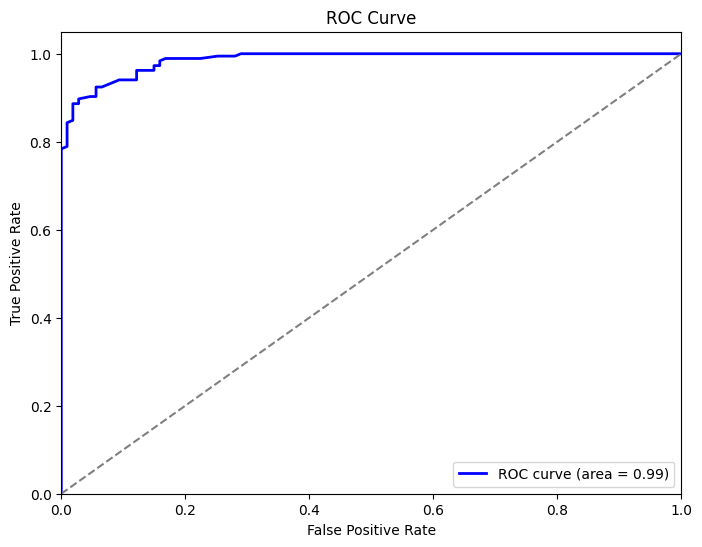

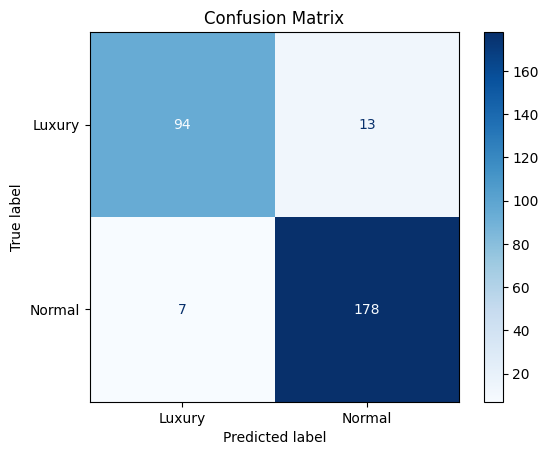

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Create a target variable based on the mean SalePrice
mean_sale_price = train['SalePrice'].mean()
train['PriceCategory'] = train['SalePrice'].apply(lambda x: 'Luxury' if x > mean_sale_price else 'Normal')

# Encode the target variable ('Luxury' and 'Normal') into numeric values
le = LabelEncoder()
train['PriceCategory'] = le.fit_transform(train['PriceCategory'])

# Prepare features (X) by removing 'SalePrice' and 'PriceCategory' columns
X_train = train.drop(columns=['SalePrice', 'PriceCategory'])  # Remove target and SalePrice columns
y_train = train['PriceCategory']  # Target is the PriceCategory (Luxury/Normal)

# Split the data into training and test sets (for evaluation)
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create RandomForestClassifier pipeline
pipeline = Pipeline(steps=[
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # RandomForestClassifier
])

# Fit the pipeline with training data
pipeline.fit(X_train_split, y_train_split)

# Make predictions on the test set
y_pred = pipeline.predict(X_test_split)
y_prob = pipeline.predict_proba(X_test_split)[:, 1]  # Probabilities for ROC curve

# Calculate the accuracy of the classification model
accuracy = accuracy_score(y_test_split, y_pred)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_split, y_prob)
roc_auc = auc(fpr, tpr)

# Print accuracy
print(f"Classification accuracy: {accuracy * 100:.2f}%")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test_split, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
